In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os #to deal with files
import seaborn as sns
import matplotlib.pyplot as plt #visualization
import librosa
import librosa.display
from IPython.display import Audio

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

## Load The DataSet


In [2]:
paths = []
labels = []
for dirname, _, filenames in os.walk('./TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded')

Dataset is loaded


In [120]:
paths[:5]

['./TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 './TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 './TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 './TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 './TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [3]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [4]:
## create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head() #now we have file path as input and label as output

,speech,label
0,./TESS Toronto emotional speech set data\OAF_a...,angry
1,./TESS Toronto emotional speech set data\OAF_a...,angry
2,./TESS Toronto emotional speech set data\OAF_a...,angry
3,./TESS Toronto emotional speech set data\OAF_a...,angry
4,./TESS Toronto emotional speech set data\OAF_a...,angry


In [5]:
df['label'].value_counts()

label
angry      800
disgust    800
fear       800
happy      800
neutral    800
ps         800
sad        800
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

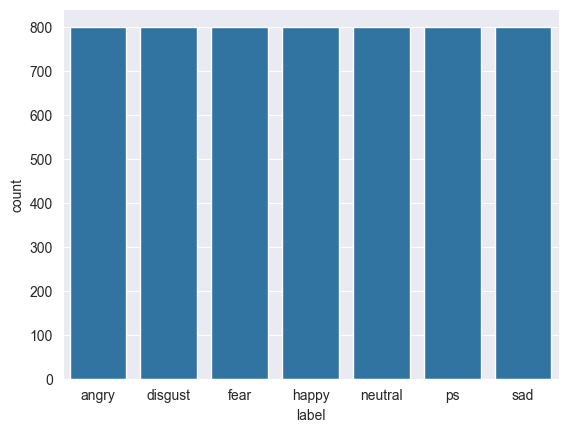

In [6]:
sns.countplot(data=df, x='label')

In [7]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

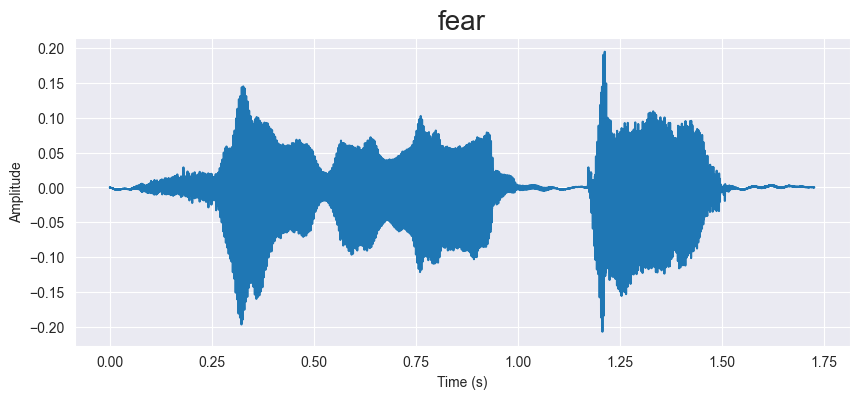

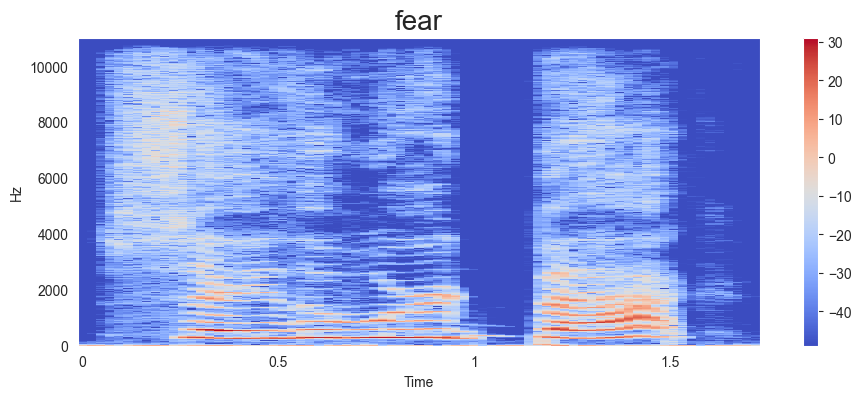

In [8]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    plt.plot(np.arange(len(data)) / sr, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(np.abs(x))
    plt.figure(figsize=(11, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveplot
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play audio
Audio(path)


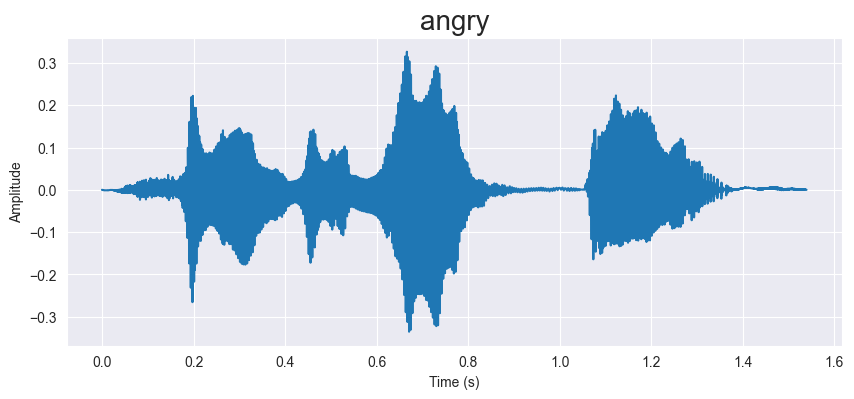

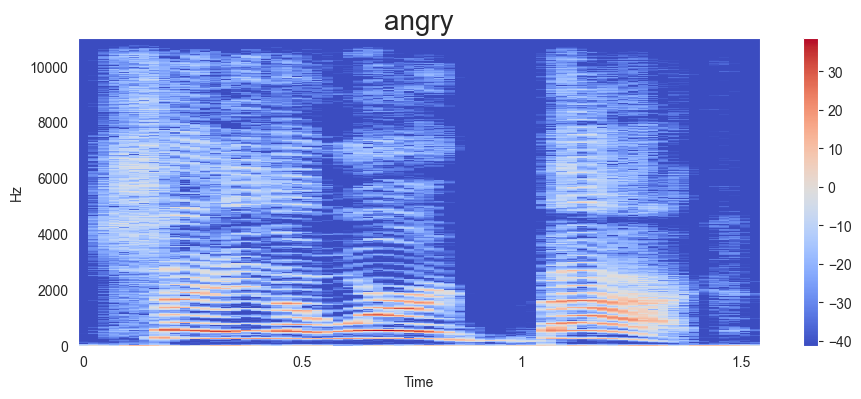

In [9]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveplot
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play audio
Audio(path)

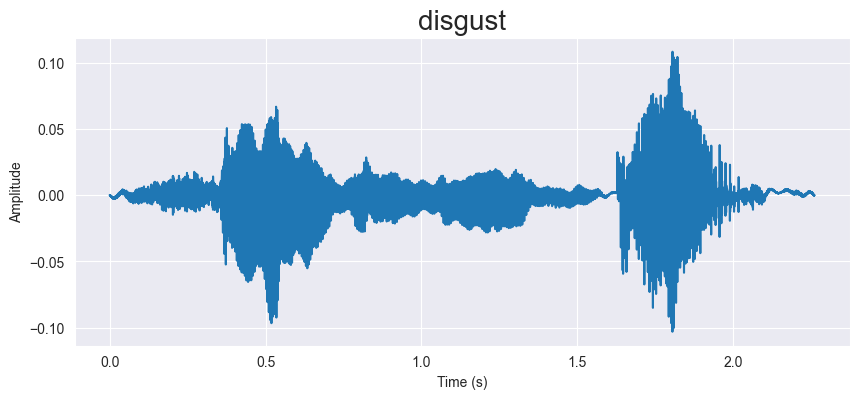

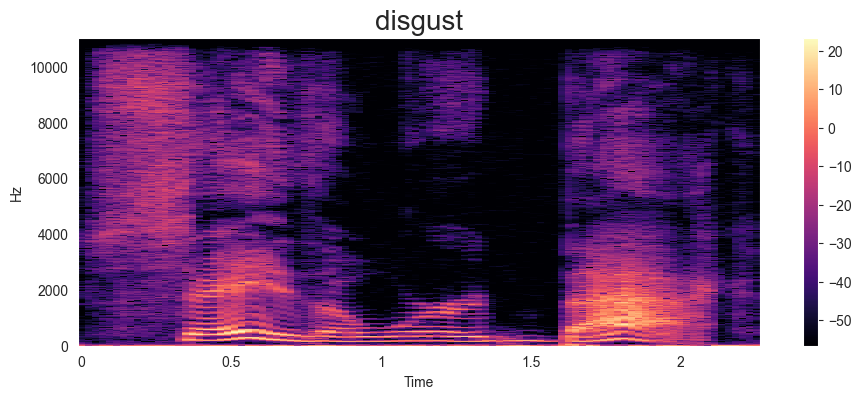

In [10]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveplot
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play audio
Audio(path)

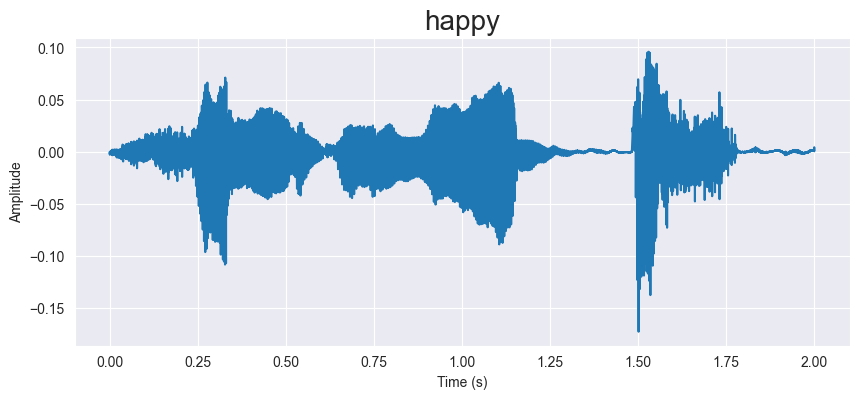

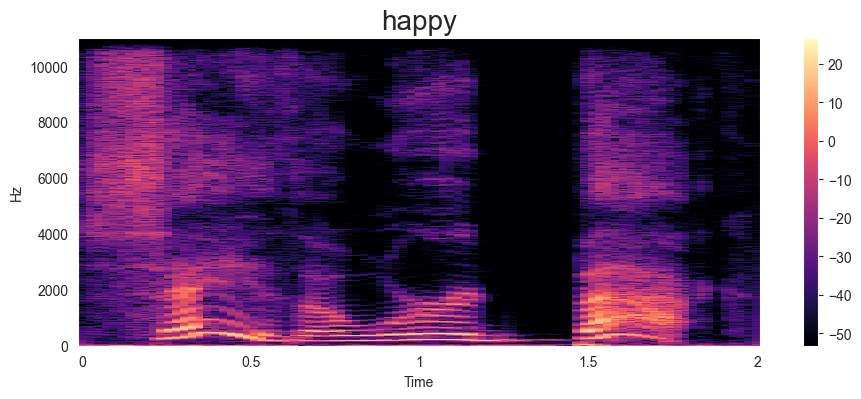

In [11]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveplot
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play audio
Audio(path)

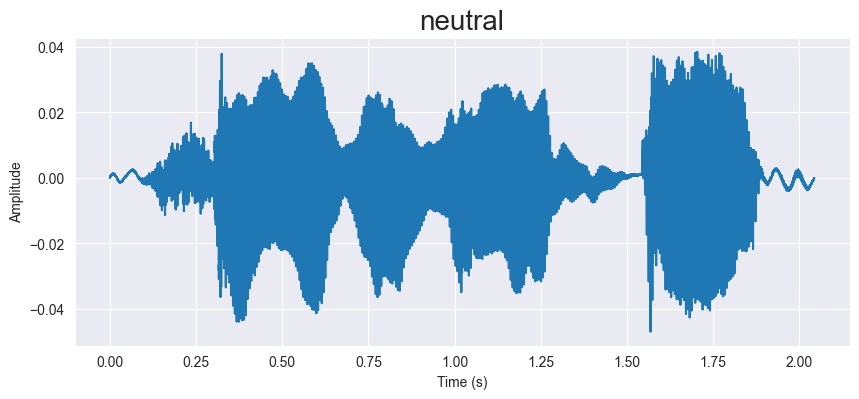

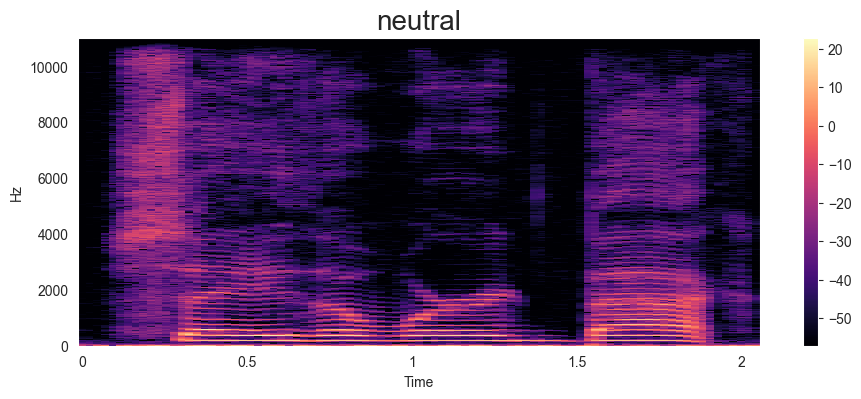

In [12]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveplot
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play audio
Audio(path)

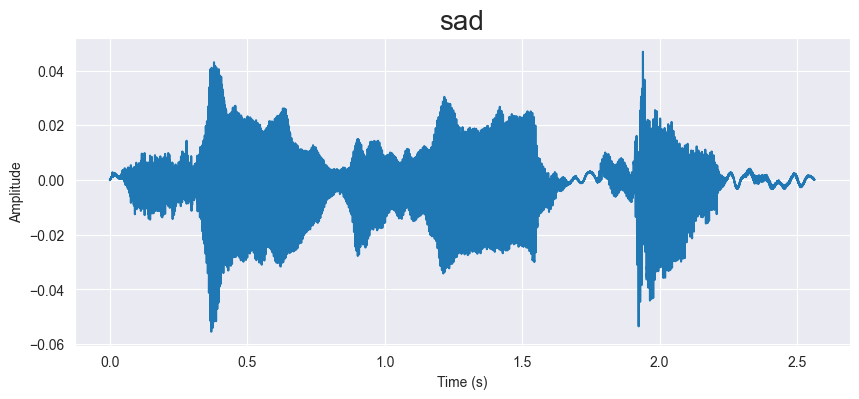

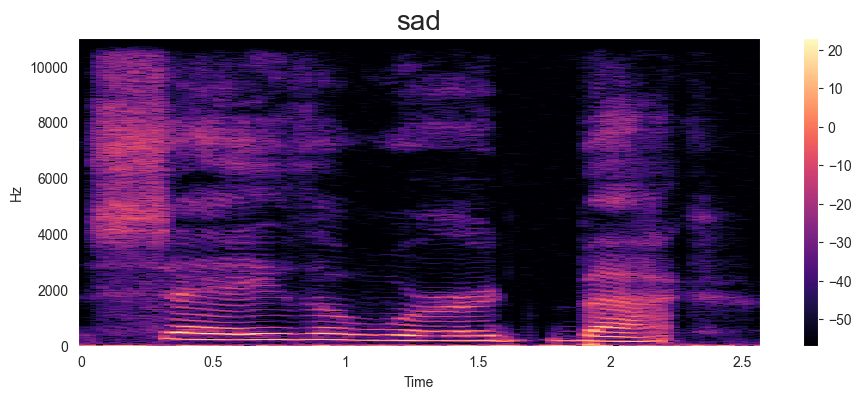

In [13]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveplot
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play audio
Audio(path)

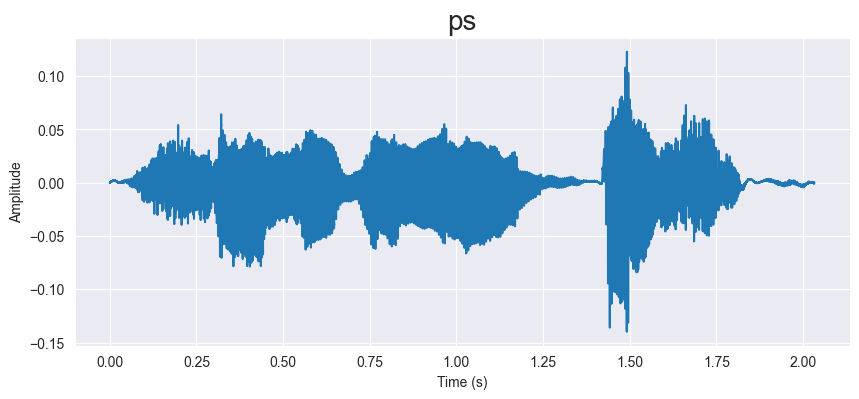

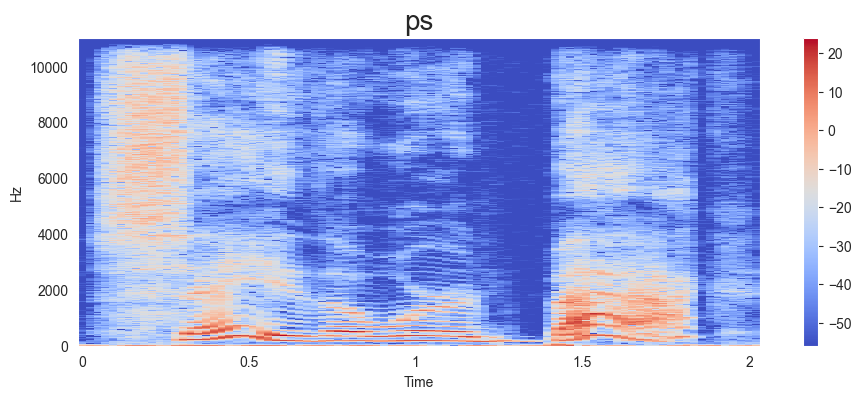

In [14]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)

# Visualize waveplot
waveplot(data, sampling_rate, emotion)

# Visualize spectrogram
spectrogram(data, sampling_rate, emotion)

# Play audio
Audio(path)

In [15]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr= sr,n_mfcc=40).T, axis=0)
    return mfcc

In [16]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666927e+01,
       -2.11275601e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228313e+00, -5.57366073e-01, -1.83255327e+00,  2.02101663e-01,
        7.27551162e-01,  1.31773746e+00,  2.88633752e+00,  2.85579062e+00,
       -4.71292210e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126190e+00, -1.79688025e+00, -7.03765249e+00,  9.43658352e+00,
        8.35585403e+00,  2.17123604e+01,  1.92169914e+01,  2.03489285e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722193e-01,  5.11131525e+00,
        9.56873894e+00,  5.45486879e+00,  2.50996351e+00, -1.82390785e+00,
        4.86896276e+00,  9.31392384e+00,  2.08914971e+00, -1.90649164e+00],
      dtype=float32)

In [17]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [18]:
X_mfcc #results

0       [-396.9862, 77.44054, -19.59279, -21.666693, -...
1       [-465.73267, 98.77373, 0.65600884, -32.74544, ...
2       [-429.79196, 46.12401, 1.5550481, -0.21709459,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
5595    [-406.48053, 80.379875, 32.462395, 46.579094, ...
5596    [-426.90918, 102.54756, 24.800041, 43.04809, 4...
5597    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
5598    [-434.8618, 89.90637, 28.373262, 39.57707, -2....
5599    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 5600, dtype: object

In [19]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [20]:
# use LSTM model
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [21]:

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [22]:
y = y.toarray()

In [23]:
y.shape

(5600, 7)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.wrappers.scikit_learn import KerasClassifier  # Import KerasClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
import joblib

# Define the model architecture
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])


In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
#Train the model
history = model.fit(X, y, validation_split = 0.2, epochs = 100, batch_size = 512, shuffle =True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.2543 - loss: 1.8309 - val_accuracy: 0.4295 - val_loss: 1.4231
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - accuracy: 0.5486 - loss: 1.2109 - val_accuracy: 0.5464 - val_loss: 0.9984
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.6886 - loss: 0.7977 - val_accuracy: 0.8179 - val_loss: 0.4158
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.7797 - loss: 0.5525 - val_accuracy: 0.8884 - val_loss: 0.2362
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.8460 - loss: 0.3776 - val_accuracy: 0.9134 - val_loss: 0.2189
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8897 - loss: 0.2966 - val_accuracy: 0.9509 - val_loss: 0.1342
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.9255 - loss: 0.2251 - val_accuracy: 0.9500 - val_loss: 0.1038
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9377 - loss: 0.2004 - val_accuracy: 0.9750 - v

In [170]:
# import pickle
# 
# # Assuming you have already trained and have your model object
# # You can save your model using pickle.dump()
# 
# # Save the model to a file
# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)
# 
# # Save the encoder (assuming you have it) for label encoding/decoding
# with open('encoder.pkl', 'wb') as f:
#     pickle.dump(enc, f)


AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'

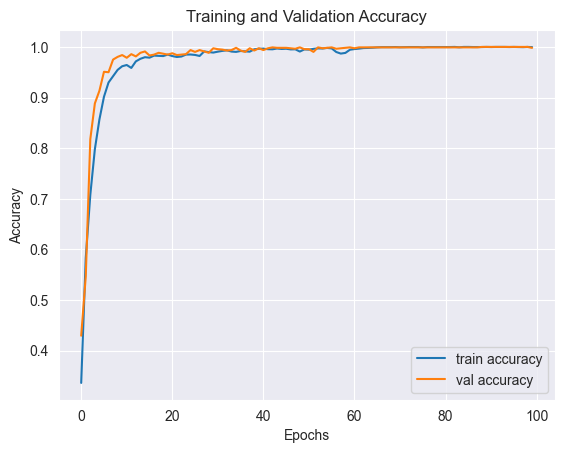

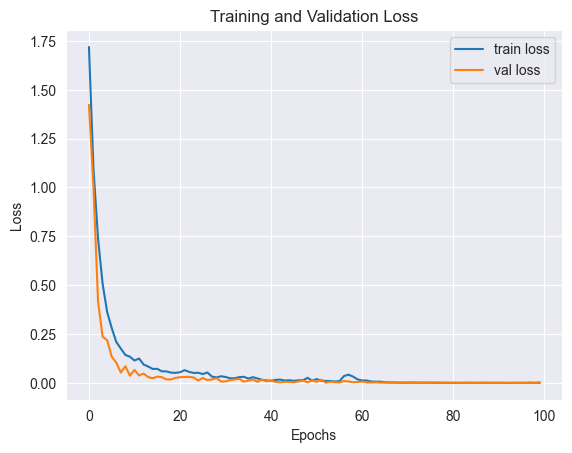

In [28]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [29]:
# Assuming X_train and y_train are your training data and labels
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

NameError: name 'X_train' is not defined

In [30]:
from sklearn.metrics import classification_report

# Load the test dataset
test_paths = []
test_labels = []
for dirname, _, filenames in os.walk('./TESS Toronto emotional speech set data/TESS Toronto emotional speech set data'):
    for filename in filenames:
        test_paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        test_labels.append(label.lower())

# Create a DataFrame for test data
test_df = pd.DataFrame()
test_df['speech'] = test_paths
test_df['label'] = test_labels

# Extract MFCC features for test data
X_test_mfcc = test_df['speech'].apply(lambda x: extract_mfcc(x))
X_test = np.array([x for x in X_test_mfcc])
X_test = np.expand_dims(X_test, -1)

# One-hot encode test labels
y_test = enc.transform(test_df[['label']]).toarray()

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert predictions to labels
y_pred_labels = enc.inverse_transform(y_pred)

# Evaluate the model
print(classification_report(test_labels, y_pred_labels))

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
              precision    recall  f1-score   support

       angry       1.00      1.00      1.00       400
     disgust       1.00      1.00      1.00       400
        fear       1.00      1.00      1.00       400
       happy       1.00      1.00      1.00       400
     neutral       1.00      1.00      1.00       400
          ps       1.00      0.99      1.00       400
         sad       1.00      1.00      1.00       400

    accuracy                           1.00      2800
   macro avg       1.00      1.00      1.00      2800
weighted avg       1.00      1.00      1.00      2800


In [31]:
import librosa
import numpy as np

def predict_emotions_per_second(audio_file_path, model, enc):
    # Load the audio file
    data, sampling_rate = librosa.load(audio_file_path)
    
    # Calculate segment length and overlap in samples (1 second segment with no overlap)
    segment_length = sampling_rate  # 1 second segment
    overlap_length = 0
    
    # Initialize lists to store segment predictions (probabilities) and their corresponding timestamps
    segment_predictions = []
    segment_timestamps = []
    
    # Iterate over the audio data in 1-second segments
    for i in range(0, len(data) - segment_length + 1, segment_length):
        segment = data[i:i+segment_length]  # Extract 1-second segment
        
        # Extract MFCC features for the segment
        mfcc_features = np.mean(librosa.feature.mfcc(y=segment, sr=sampling_rate, n_mfcc=40).T, axis=0)
        
        # Reshape MFCC features to match the input shape of the model
        mfcc_features = np.expand_dims(mfcc_features, axis=0)
        mfcc_features = np.expand_dims(mfcc_features, axis=-1)
        
        # Predict the output label probabilities for the segment
        predicted_probabilities = model.predict(mfcc_features)
        
        # Store the predicted probabilities and corresponding timestamp
        segment_predictions.append(predicted_probabilities[0])  # Append probabilities for all emotions
        segment_timestamps.append(i / sampling_rate)  # Convert sample index to time
    
    return segment_timestamps, segment_predictions

# Example usage:
audio_file_path = './output.wav'
segment_timestamps, segment_predictions = predict_emotions_per_second(audio_file_path, model, enc)

# Print the predicted emotions probabilities for each second along with their timestamps
for timestamp, probabilities in zip(segment_timestamps, segment_predictions):
    print(f"At {timestamp:.2f} seconds:")
    for emotion, probability in zip(enc.categories_[0], probabilities):
        print(f"{emotion}: {probability:.2f}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
At 0.00 seconds:
angry: 0.00
disgust: 0.00
fear: 1.00
happy: 0.00
neutral: 0.00
ps: 0.00
sad: 0.00

At 1.00 seconds:
angry: 0.00
disgust: 0.00
fear: 1.00
happy: 0.00
neutral: 0.00
ps: 0.00
sad: 0.00

At 2.00 seconds:
angry: 0.00
disgust: 0.00
fear: 1.00
happy: 0.00
neutral: 0.00
ps: 0.00
sad: 0.00

At 3.00 seconds:
angry: 0.00
disgust: 0.00
fear: 1.00
happy: 0.00
neutral: 0.00
ps: 0.00
sad: 0.00

At 4.00 seconds:
angry: 0.00
disgust: 0.00
fear: 1.00
happy: 0.00
neutral: 0.00
ps: 0.00
sad: 0.00

At 5.00 seconds:
angry: 0.00
disgust: 0.00
fear: 1.00
happy: 0.00
neutral: 0.00
ps: 0.00
sad: 0.00

At 6.00 seconds:
angry: 0.00
disgust: 0.00
fear: 1.00
happy: 0.00
neutral: 0.00
ps: 0.00
sad: 0.00


In [32]:
import numpy as np
import pandas as pd
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from joblib import dump
from joblib import load

# Load data
paths = []
labels = []
for dirname, _, filenames in os.walk('./TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

# Create DataFrame
df = pd.DataFrame({'path': paths, 'label': labels})

# Define a function to extract features
def extract_features(file_path):
    data, sr = librosa.load(file_path, duration=3)  # Load audio file with duration of 3 seconds
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)  # Extract MFCC features
    mfccs_processed = np.mean(mfccs.T, axis=0)  # Take the mean of MFCCs over time
    return mfccs_processed

# Apply feature extraction to all files
df['features'] = df['path'].apply(extract_features)

# Split data into features and labels
X = np.array(df['features'].tolist())
y = np.array(df['label'])

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define and train your model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42))
])
model.fit(X_train, y_train)

# Evaluate model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

# Save model
dump(model, 'emotion_detection_model.joblib')
dump(label_encoder, 'label_encoder.joblib')


Accuracy: 0.9991071428571429


['label_encoder.joblib']

In [5]:
# Load the model from file
model = load('./emotion_detection_model.joblib')

# Load the encoder from file
enc = load('label_encoder.joblib')

def extract_mfcc(audio_file_path):
    # Load the audio file
    data, sampling_rate = librosa.load(audio_file_path)
    
    # Extract MFCC features
    mfcc_features = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40)
    
    # Return the mean of MFCC features
    return np.mean(mfcc_features.T, axis=0)

# Example usage:
audio_file_path = './recorded_audio.wav'
input_features = extract_mfcc(audio_file_path)

# Reshape the input features (if needed) to match the input shape of your model
input_features = input_features.reshape(1, -1)  # Assuming your model expects a single sample

# Make predictions using the loaded model
predictions = model.predict(input_features)

# Decode the predictions using the loaded encoder
predicted_emotion = enc.inverse_transform(predictions)

print("Predicted emotion:", predicted_emotion)

Predicted emotion: ['fear']


In [4]:
import sounddevice as sd
import soundfile as sf

# Set up audio recording parameters
fs = 44100  # Sampling frequency
duration = 15  # Duration of recording in seconds
output_file = "recorded_audio.wav"  # Output file name

# Start recording audio from the microphone
print("Recording audio for 15 seconds...")
audio_data = sd.rec(int(fs * duration), samplerate=fs, channels=1, dtype='float64')
sd.wait()  # Wait for recording to complete

# Save the recorded audio to a WAV file
sf.write(output_file, audio_data, fs)

print("Recording completed. Audio saved to", output_file)


Recording audio for 15 seconds...
Recording completed. Audio saved to recorded_audio.wav


In [7]:
import librosa
import numpy as np
from joblib import load

# Load the model and encoder
model = load('./emotion_detection_model.joblib')
enc = load('./label_encoder.joblib')

# Function to extract MFCC features
def extract_mfcc(audio_data, sampling_rate):
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=40)
    return np.mean(mfcc_features.T, axis=0)

# Function to predict emotions from audio data
def predict_emotion(audio_data, sampling_rate):
    input_features = extract_mfcc(audio_data, sampling_rate)
    input_features = input_features.reshape(1, -1)
    predictions = model.predict(input_features)
    predicted_emotion = enc.inverse_transform(predictions)
    return predicted_emotion[0]

# Load the recorded audio file
audio_file = "recorded_audio.wav"
audio_data, sampling_rate = librosa.load(audio_file, sr=None, mono=True)

# Define chunk duration
chunk_duration = 3  # Duration of each chunk in seconds

# Calculate the number of chunks
total_duration = librosa.get_duration(y=audio_data, sr=sampling_rate)
num_chunks = int(np.ceil(total_duration / chunk_duration))

# Predict emotions for each chunk
print("Predicted emotions for each 3-second chunk:")
for i in range(num_chunks):
    start_time = i * chunk_duration
    end_time = min((i + 1) * chunk_duration, total_duration)
    start_idx = int(start_time * sampling_rate)
    end_idx = int(end_time * sampling_rate)
    chunk_audio = audio_data[start_idx:end_idx]
    predicted_emotion = predict_emotion(chunk_audio, sampling_rate)
    print(f"Chunk {i+1} (Time: {start_time:.2f}-{end_time:.2f}): {predicted_emotion}")


Predicted emotions for each 3-second chunk:
Chunk 1 (Time: 0.00-3.00): angry
Chunk 2 (Time: 3.00-6.00): angry
Chunk 3 (Time: 6.00-9.00): angry
Chunk 4 (Time: 9.00-12.00): ps
Chunk 5 (Time: 12.00-15.00): ps
